In [1]:
import numpy as np
from annfuncs import *
from sine_data import *

In [2]:
x_train, y_train, x_val, y_val = generate_sine_data()

In [3]:
print("No. of training samples: ", x_train.shape[1])
print("No. of validation samples: ", x_val.shape[1])

No. of training samples:  1000
No. of validation samples:  300


In [36]:
# Set hyperparameters
mini_batch_size = 64
learning_rate = 0.001
num_iterations = 4000
activation = "tanh"
cost_func = "mse"

# Regularization
regularisation = "L2" # none or L2
lambd = 0.25

# Optimizer
optimizer = "adam" # none or momentum or adam
beta = 0.9
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Define model
layers_dims = [1, 20, 20, 1]

Cost after epoch 0: 0.632574,  Valid err: 0.422121
Cost after epoch 1: 0.612112,  Valid err: 0.411584
Cost after epoch 2: 0.600399,  Valid err: 0.403894
Cost after epoch 3: 0.585121,  Valid err: 0.397010
Cost after epoch 4: 0.571547,  Valid err: 0.391336
Cost after epoch 5: 0.561938,  Valid err: 0.387299
Cost after epoch 6: 0.555397,  Valid err: 0.382914
Cost after epoch 7: 0.544605,  Valid err: 0.379022
Cost after epoch 8: 0.541289,  Valid err: 0.375801
Cost after epoch 9: 0.532978,  Valid err: 0.373010
Cost after epoch 10: 0.530367,  Valid err: 0.370445
Cost after epoch 11: 0.520012,  Valid err: 0.367575
Cost after epoch 12: 0.510035,  Valid err: 0.333120
Cost after epoch 13: 0.304208,  Valid err: 0.150512
Cost after epoch 14: 0.226222,  Valid err: 0.127497
Cost after epoch 15: 0.205221,  Valid err: 0.110354
Cost after epoch 16: 0.188076,  Valid err: 0.098454
Cost after epoch 17: 0.178604,  Valid err: 0.091270
Cost after epoch 18: 0.170200,  Valid err: 0.083470
Cost after epoch 19: 0

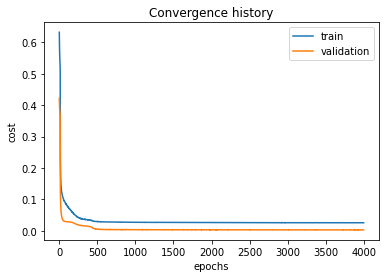

In [37]:
# Train the model
parameters = L_layer_model_minib(x_train, y_train, layers_dims,
                valid = True, valid_x = x_val, valid_y = y_val, num_iterations = num_iterations,
                he_init = True, mini_batch_size = mini_batch_size, learning_rate = learning_rate, print_cost = True,
                regularisation = regularisation, lambd = lambd,
                optimizer = optimizer, beta = beta, beta1 = beta1, beta2 = beta2, epsilon = epsilon,
                activation = activation, cost_func = cost_func)

In [12]:
# parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.04, num_iterations = 10000, print_cost = True, cost_func = "mse", activation = "tanh", he_init=True)
# parameters = L_layer_model_minib(x_train, y_train,layers_dims,valid=True,valid_x=x_val,valid_y=y_val,num_iterations = 5000,
#                 he_init=True, mini_batch_size = 1000,learning_rate = 0.01, print_cost = True,regularisation='none',lambd=0.1,
#                 optimizer="adam", beta = 0.9, beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,activation='tanh',cost_func='mse')


In [13]:
# activation = "tanh"

# train_mse = test_regression(train_x, train_y, parameters, activation, activation)
# test_mse = test_regression(test_x, test_y, parameters, activation, activation)

In [34]:
preds, cache = L_model_forward(x_val, parameters, activation=activation)

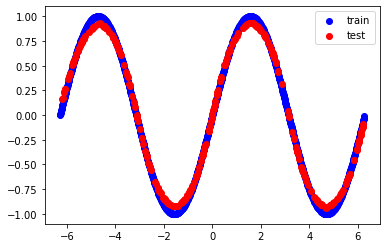

In [35]:
plt.scatter(x_train[0],y_train[0],color='blue')
plt.scatter(x_val[0],preds[0],color='red')
plt.legend(['train','test'])
plt.show()

In [38]:
# MAPE
pred_val = predictvals(x_val, parameters, activation=activation)
mape_val = mape_cost(y_val, pred_val)
print("Validation mape : ", mape_val)

Validation mape :  26.404783381497793


r2 score for perfect model is 0.9958201105769453


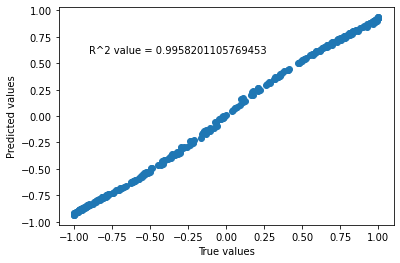

In [40]:
# R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_val.T, preds.T)
print('r2 score for perfect model is', r2)

plt.scatter(y_val.T,preds.T)
plt.xlabel("True values")
plt.ylabel("Predicted values")
txt = "R^2 value = " + str(r2)
# plt.title("Custom ANN\n" + txt)
plt.text(-0.9, 0.6, txt, fontsize = 10)
plt.show()